In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas.io import wb
import numpy as np
import matplotlib.pyplot as plt

Na podstawie [Pandas Remote Data](http://pandas.pydata.org/pandas-docs/stable/remote_data.html); zobacz też [inny wstęp](http://nbviewer.ipython.org/github/psychemedia/dataviz4development/blob/master/dataloaders/World%20Bank%20Demo.ipynb).

In [2]:
kraje = wb.get_countries().set_index('name')

In [3]:
kraje.head()

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,region
name,,,,,,,,,
Aruba,,Oranjestad,ABW,High income: nonOECD,AW,12.5167,Not classified,-70.0167,Latin America & Caribbean (all income levels)
Afghanistan,South Asia,Kabul,AFG,Low income,AF,34.5228,IDA,69.1761,South Asia
Africa,,,AFR,Aggregates,A9,,Aggregates,,Aggregates
Angola,Sub-Saharan Africa (developing only),Luanda,AGO,Upper middle income,AO,-8.81155,IBRD,13.242,Sub-Saharan Africa (all income levels)
Albania,Europe & Central Asia (developing only),Tirane,ALB,Upper middle income,AL,41.3317,IBRD,19.8172,Europe & Central Asia (all income levels)


In [4]:
# poprawiamy współrzędne (dostaliśmy je jako napisy, zamist - liczb)
kraje['latitude'] = [float(x) if x != "" else np.nan for x in kraje['latitude']]
kraje['longitude'] = [float(x) if x != "" else np.nan for x in kraje['longitude']]

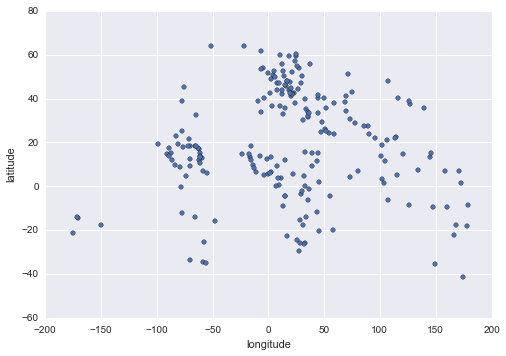

In [5]:
kraje.dropna().plot(kind='scatter', x='longitude', y='latitude')

In [6]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
700,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
4683,GDPPCKD,"GDP per Capita, constant US$, millions"
6706,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
6708,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
6710,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [7]:
wb.search('fertility rate').iloc[:,:2]

,id,name
7758,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."
7798,SP.DYN.TFRT.IN,"Fertility rate, total (births per woman)"
7799,SP.DYN.TFRT.Q1,Total fertility rate (TFR) (births per woman)...
7800,SP.DYN.TFRT.Q2,Total fertility rate (TFR) (births per woman)...
7801,SP.DYN.TFRT.Q3,Total fertility rate (TFR) (births per woman)...
7802,SP.DYN.TFRT.Q4,Total fertility rate (TFR) (births per woman)...
7803,SP.DYN.TFRT.Q5,Total fertility rate (TFR) (births per woman)...
7806,SP.DYN.WFRT,Wanted fertility rate (births per woman)
7807,SP.DYN.WFRT.Q1,Total wanted fertility rate (births per woman)...
7808,SP.DYN.WFRT.Q2,Total wanted fertility rate (births per woman)...


In [8]:
wskazniki = ['NY.GDP.PCAP.KD', 'SP.DYN.TFRT.IN', 'SH.DYN.NMRT']
dane = wb.download(indicator=wskazniki, country='all', start=2011, end=2011).groupby(level=0).mean()
dane.columns = ['gdp', 'fertility rate', 'infant mortality']
print(dane.tail())

                            gdp  fertility rate  infant mortality
country                                                          
West Bank and Gaza  1408.291836         4.14400              12.8
World               7758.427905         2.47573              21.1
Yemen, Rep.          728.326235         4.34800              25.9
Zambia               986.452717         5.77300              30.3
Zimbabwe             435.794144         3.64300              39.1


In [9]:
# dodajemy informację o regionie
dane['region'] = kraje['region']

In [10]:
# skalujemy produkt krajowy brutto
dane['log10_gdp'] = np.log10(dane['gdp'])

In [11]:
# interesują nas tylko kraje, nie - dane zbiorcze dla regionów
dane = dane.query("region != 'Aggregates'")

In [12]:
# usuwamy niepotrzebne rzeczy
dane['region'] = [x.replace(" (all income levels)", "") for x in dane['region']]
dane = dane.dropna()

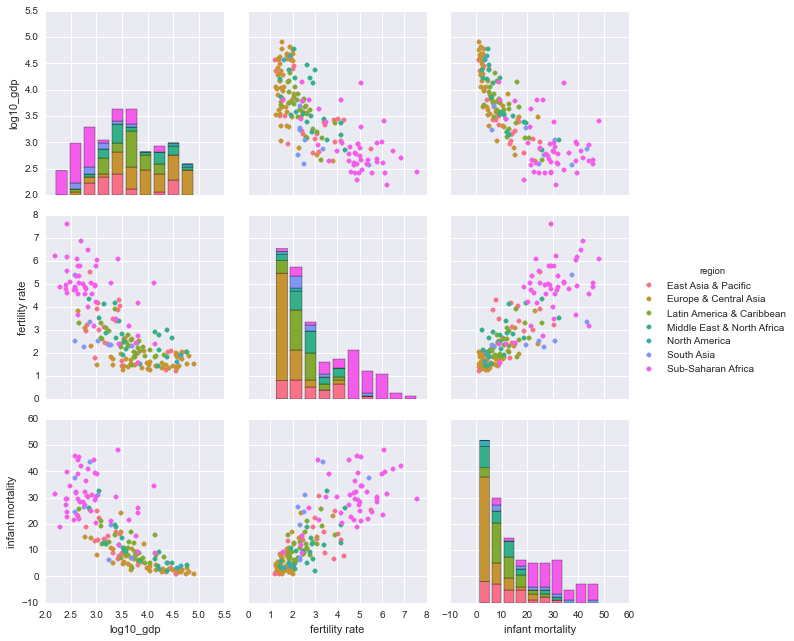

In [13]:
sns.pairplot(dane[['log10_gdp', 'fertility rate', 'infant mortality', 'region']],
             hue='region');

In [14]:
# ciekawe? :)
# zgłoś się na Szkołę Letnią Analizy Danych, organizowaną przez DELab UW!
# http://www.delab.uw.edu.pl/szkola-letnia-dane-2015/

In [15]:
# A może by tak w stylu DELab?

In [16]:
# tylko dwa regiony
kawalek = dane[(dane.region == "Europe & Central Asia") | (dane.region == "East Asia & Pacific")]

In [17]:
# po polsku!
kawalek = kawalek.rename(columns={"gdp": "produkt krajowy brutto [$]",
                                  "fertility rate": "współczynnik dzietności"})

tlumacz = {"East Asia & Pacific": "Azja Wschodnia i Pacyfik",
           "Europe & Central Asia": "Europa i Azja Środkowa"}
kawalek['region'] = [tlumacz[x] for x in kawalek['region']]

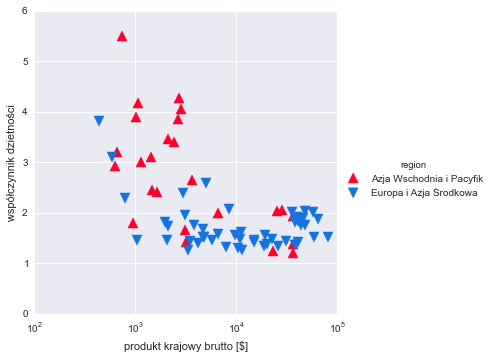

In [18]:
g = sns.FacetGrid(kawalek, hue="region", size=5,
                  hue_kws={"marker": ["^", "v"], "color": ["#FF002D", "#1473E1"]})
g.map(plt.scatter,
      "produkt krajowy brutto [$]", "współczynnik dzietności",
      s=100, linewidth=0.5, edgecolor="white")
g.set(xscale="log")
g.add_legend()

In [19]:
# Fajnie, nie?